# Binarna klasifikacija - normalna konekcija ili napad

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import losses, optimizers

from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import linear_model
from sklearn import metrics

import category_encoders as ce
from keras.callbacks import TensorBoard
import imblearn

from sklearn.decomposition import PCA

np.random.seed(10)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('kddcup.csv.data_10_percent_corrected')

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [5]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
y = data['class']

Klase koje su normalne oznacavamo sa 0, a klase koje su napad sa 1.

In [7]:
y = [instance!='normal.' for instance in y]

Vidimo da je skup nebalansiran. Ima vise klasa koje su napad nego koje su normalne.

In [8]:
np.bincount(y)

array([ 97278, 396743])

In [9]:
X = data.drop(columns = ['class'], axis = 1)

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y, random_state=7)

In [11]:
X_train.shape

(330994, 41)

In [12]:
X_test.shape

(163027, 41)

In [13]:
np.bincount(y_train)

array([ 65176, 265818])

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330994 entries, 381636 to 447045
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     330994 non-null  int64  
 1   protocol_type                330994 non-null  object 
 2   service                      330994 non-null  object 
 3   flag                         330994 non-null  object 
 4   src_bytes                    330994 non-null  int64  
 5   dst_bytes                    330994 non-null  int64  
 6   land                         330994 non-null  int64  
 7   wrong_fragment               330994 non-null  int64  
 8   urgent                       330994 non-null  int64  
 9   hot                          330994 non-null  int64  
 10  num_failed_logins            330994 non-null  int64  
 11  logged_in                    330994 non-null  int64  
 12  num_compromised              330994 non-null  int64  

In [15]:
train_data_statistics = X_train.describe()

In [16]:
train_data_statistics

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,330994.000000,3.309940e+05,3.309940e+05,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000,...,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000,330994.000000
mean,46.959335,3.781100e+03,9.051437e+02,0.000045,0.006490,0.000015,0.035753,0.000160,0.148284,0.011674,...,232.473731,188.645344,0.753769,0.030737,0.601631,0.006662,0.176877,0.176589,0.058117,0.057421
std,687.679468,1.206754e+06,3.495557e+04,0.006732,0.135354,0.005765,0.803308,0.017118,0.355381,2.135355,...,64.753545,106.067295,0.410824,0.108691,0.481359,0.042284,0.380705,0.381043,0.230613,0.230171
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,45.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40806.000000,6.933756e+08,5.153460e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
train_data_correlation_matrix = X_train.corr()

In [18]:
train_data_correlation_matrix

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,3.981914e-03,0.007608,-0.000460,-0.003274,0.005432,0.015015,0.007488,-0.016027,0.067862,...,0.008551,-0.118743,-0.119479,0.410677,0.042988,-0.006187,-0.030669,-0.030819,0.007345,0.011162
src_bytes,0.003982,1.000000e+00,-0.000016,-0.000021,-0.000144,-0.000005,0.004416,-0.000027,0.001314,0.000078,...,-0.001447,-0.003723,-0.002699,0.000808,-0.000994,0.001043,-0.000612,0.001646,-0.000349,0.001755
dst_bytes,0.007608,-1.577687e-05,1.000000,-0.000174,-0.001241,0.020804,0.004006,0.063157,0.046129,0.026094,...,-0.047195,-0.006561,0.006354,-0.005657,-0.019531,0.006636,-0.010881,-0.010757,-0.004649,-0.005331
land,-0.000460,-2.109336e-05,-0.000174,1.000000,-0.000323,-0.000018,-0.000300,-0.000063,-0.002809,-0.000037,...,-0.023864,-0.011702,0.002058,-0.000293,0.003884,0.081834,0.012422,0.008329,-0.001444,-0.001679
wrong_fragment,-0.003274,-1.443590e-04,-0.001241,-0.000323,1.000000,-0.000126,-0.002134,-0.000448,-0.020005,-0.000262,...,-0.005078,-0.058661,-0.055170,0.069775,-0.031932,0.011671,-0.019343,-0.022219,0.028793,-0.011961
urgent,0.005432,-4.956739e-06,0.020804,-0.000018,-0.000126,1.000000,0.000536,0.183667,0.006280,0.016675,...,-0.006453,-0.004621,-0.004030,0.005768,-0.002633,-0.000413,-0.001217,-0.001214,-0.000660,-0.000654
hot,0.015015,4.416497e-03,0.004006,-0.000300,-0.002134,0.000536,1.000000,0.007273,0.106212,0.005453,...,-0.026882,-0.040026,-0.030152,0.000085,-0.053374,-0.004748,-0.019582,-0.020335,-0.007006,-0.007926
num_failed_logins,0.007488,-2.686718e-05,0.063157,-0.000063,-0.000448,0.183667,0.007273,1.000000,0.000070,0.007883,...,-0.023168,-0.014881,-0.000889,0.002437,-0.008681,0.022192,-0.001745,-0.002436,0.020671,0.019052
logged_in,-0.016027,1.313566e-03,0.046129,-0.002809,-0.020005,0.006280,0.106212,0.000070,1.000000,0.013102,...,-0.621647,0.119520,0.161534,-0.061998,-0.461581,0.139284,-0.191069,-0.191809,-0.090864,-0.087607
num_compromised,0.067862,7.801607e-05,0.026094,-0.000037,-0.000262,0.016675,0.005453,0.007883,0.013102,1.000000,...,-0.008874,-0.005296,-0.003253,0.000718,-0.006525,0.000960,-0.001998,-0.001625,-0.000844,-0.000890


Vizuelno prikazujemo matricu korelacije atributa.

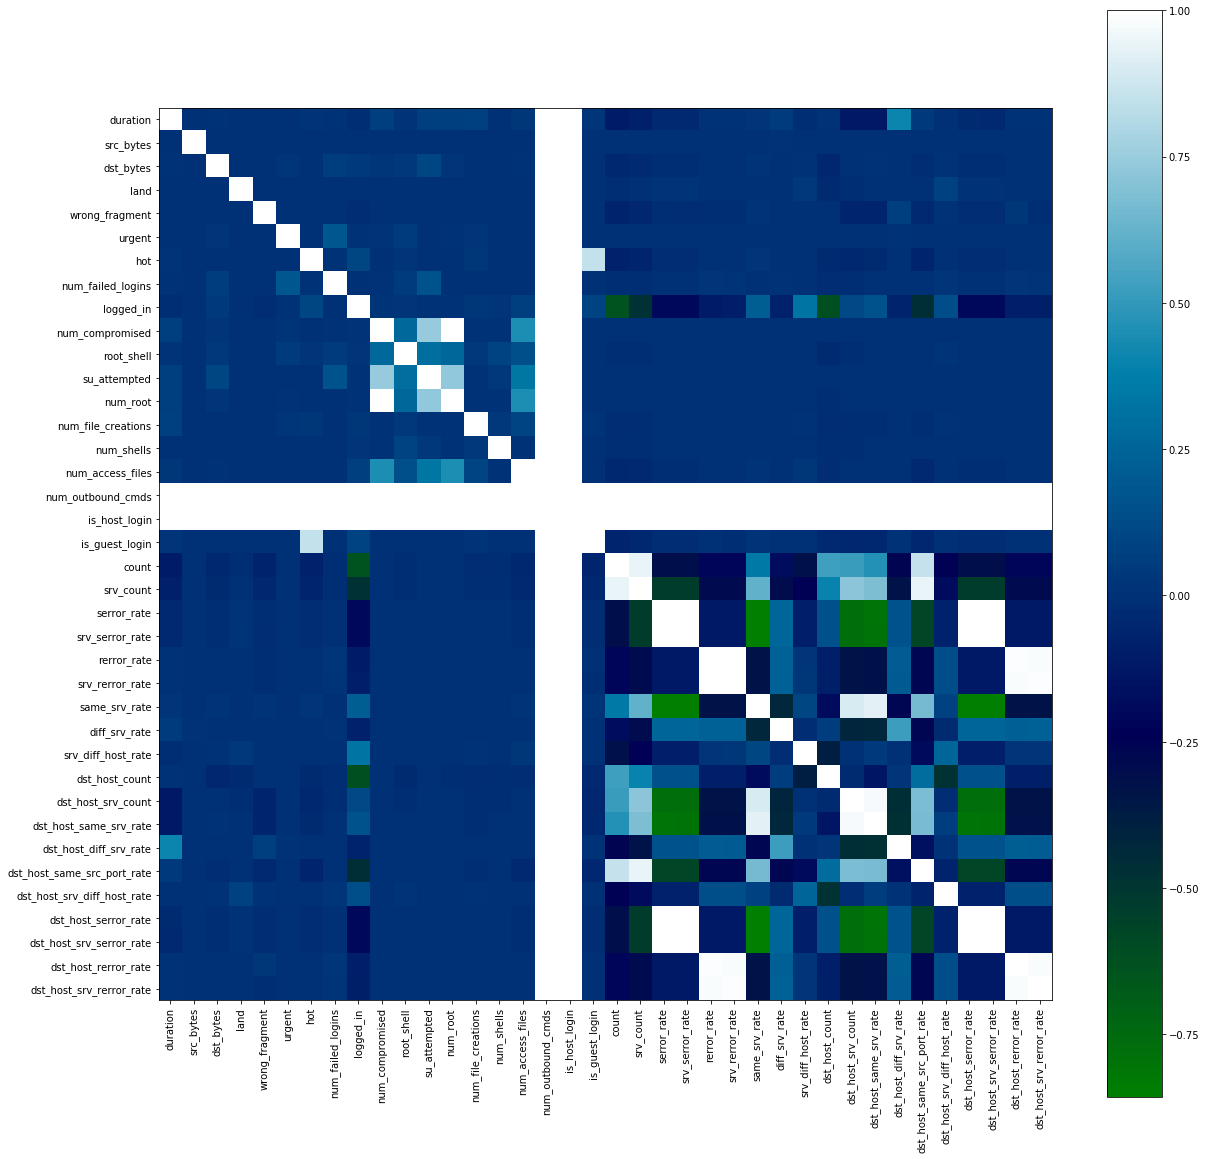

In [19]:
dimension = train_data_correlation_matrix.shape[0]

plt.figure(figsize = (20, 20))
plt.imshow(train_data_correlation_matrix, cmap = 'ocean')
plt.colorbar()
plt.xticks(ticks = np.arange(dimension), labels = train_data_correlation_matrix.columns, rotation = '90')
plt.yticks(ticks = np.arange(dimension), labels = train_data_correlation_matrix.columns)
plt.show()

Primecujemo da su dva atributa - 'is_host_login' i 'num_outbound_cmds' pozitivno potpuno korelisana sa svim ostalim atributima, odnosno imaju vrednost korelacije 1 sa svim atributima, sto deluje cudno.

In [20]:
train_data_correlation_matrix['is_host_login']

duration                      NaN
src_bytes                     NaN
dst_bytes                     NaN
land                          NaN
wrong_fragment                NaN
urgent                        NaN
hot                           NaN
num_failed_logins             NaN
logged_in                     NaN
num_compromised               NaN
root_shell                    NaN
su_attempted                  NaN
num_root                      NaN
num_file_creations            NaN
num_shells                    NaN
num_access_files              NaN
num_outbound_cmds             NaN
is_host_login                 NaN
is_guest_login                NaN
count                         NaN
srv_count                     NaN
serror_rate                   NaN
srv_serror_rate               NaN
rerror_rate                   NaN
srv_rerror_rate               NaN
same_srv_rate                 NaN
diff_srv_rate                 NaN
srv_diff_host_rate            NaN
dst_host_count                NaN
dst_host_srv_c

In [21]:
train_data_correlation_matrix['num_outbound_cmds']

duration                      NaN
src_bytes                     NaN
dst_bytes                     NaN
land                          NaN
wrong_fragment                NaN
urgent                        NaN
hot                           NaN
num_failed_logins             NaN
logged_in                     NaN
num_compromised               NaN
root_shell                    NaN
su_attempted                  NaN
num_root                      NaN
num_file_creations            NaN
num_shells                    NaN
num_access_files              NaN
num_outbound_cmds             NaN
is_host_login                 NaN
is_guest_login                NaN
count                         NaN
srv_count                     NaN
serror_rate                   NaN
srv_serror_rate               NaN
rerror_rate                   NaN
srv_rerror_rate               NaN
same_srv_rate                 NaN
diff_srv_rate                 NaN
srv_diff_host_rate            NaN
dst_host_count                NaN
dst_host_srv_c

Vidimo da je razlog onog rezultata u matrici korelacije to sto je vrednost korelacije ova dva atributa sa svim ostalim 'NaN'. Pogledajmo statistike ovih atributa.

In [22]:
train_data_statistics['is_host_login']

count    330994.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: is_host_login, dtype: float64

In [23]:
train_data_statistics['num_outbound_cmds']

count    330994.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

Primecujemo da ovi atributa svuda imaju vrednost 0. Stoga, ne nose nikakvu informaciju za odredjivanje da li je konekcija napad ili ne, pa se mogu izbaciti.

In [24]:
X_train = X_train.drop(columns = ['is_host_login', 'num_outbound_cmds'], axis = 1)

In [25]:
X_test = X_test.drop(columns = ['is_host_login', 'num_outbound_cmds'], axis = 1)

In [26]:
X_train.shape

(330994, 39)

In [27]:
X_test.shape

(163027, 39)

Da bismo primenili PCA algoritam na podatke, potrebno je da podatke razdvojimo na dva skupa. U jednom ce biti samo numericki atributi i na njega cemo primeniti PCA algoritam. Drugi ce biti samo kategoricki atributi na koje cemo primeniti binarno kodiranje. A potom cemo tako izmenjene skupove podataka nadovezati.

In [28]:
X_train_without_categorical = X_train.drop(columns = ['protocol_type', 'service', 'flag'], axis = 1)

In [29]:
X_test_without_categorical = X_test.drop(columns = ['protocol_type', 'service', 'flag'], axis = 1)

In [30]:
X_train_without_categorical.shape

(330994, 36)

In [31]:
X_test_without_categorical.shape

(163027, 36)

In [32]:
X_train_only_categorical = X_train.filter(['protocol_type', 'service', 'flag'])

In [33]:
X_test_only_categorical = X_test.filter(['protocol_type', 'service', 'flag'])

In [34]:
X_train_only_categorical.shape

(330994, 3)

In [35]:
X_test_only_categorical.shape

(163027, 3)

S obzirom na to da nam za RFE treba kompletan skup podataka, a ne izmenjen kao sto je slucaj sa PCA, vrsimo binarno enkodiranje 3 kategoricka atributa u okviru celog skupa podataka. Nakon cega, vrsimo standardizaciju celog skupa podataka.

In [36]:
# Potrebno nam je u rfe
encoder = ce.BinaryEncoder(X_train, cols = ['protocol_type', 'service', 'flag'])
X_train = encoder.fit_transform(X_train)

In [37]:
X_test = encoder.transform(X_test)

In [38]:
X_train.shape

(330994, 52)

In [39]:
X_test.shape

(163027, 52)

In [40]:
# Potrebno nam je u rfe
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Vracamo se na rad sa PCA. Enkodiramo kategoricke atribute.

In [41]:
encoderPCA = ce.BinaryEncoder(X_train_only_categorical)
X_train_only_categorical = encoderPCA.fit_transform(X_train_only_categorical)

In [42]:
X_test_only_categorical = encoderPCA.transform(X_test_only_categorical)

Standardizujemo numericke atribute.

In [43]:
scalerPCA = preprocessing.StandardScaler()
scalerPCA.fit(X_train_without_categorical)
X_train_without_categorical = scalerPCA.transform(X_train_without_categorical)
X_test_without_categorical = scalerPCA.transform(X_test_without_categorical)

Primenjujemo PCA na numericke atribute, pri cemu odlucujemo da cemo dimenzionalnost smanjiti na 20 atributa. Taj broj je utvrdjen eksperimentalno. Cilj je bio da se broj komponenti smanji sto vise, a da se zadrzi sto vise informacija.

In [44]:
pca = PCA(n_components=20)
pca.fit(X_train_without_categorical, y_train)
X_train_pca = pca.transform(X_train_without_categorical)
X_test_pca = pca.transform(X_test_without_categorical)

In [45]:
pca.explained_variance_ratio_

array([0.22288745, 0.12537293, 0.08889078, 0.08411977, 0.05147481,
       0.04238441, 0.03400449, 0.0305385 , 0.02955911, 0.02818651,
       0.02790484, 0.02776987, 0.0273018 , 0.02589332, 0.02380397,
       0.02331603, 0.02281089, 0.02028547, 0.01922041, 0.01041909])

In [46]:
sum(pca.explained_variance_ratio_)

0.9661444473119573

Primecujemo da smo uspeli da zadrzimo oko 97% informacija.

In [47]:
X_train_pca.shape

(330994, 20)

In [48]:
X_test_pca.shape

(163027, 20)

In [49]:
X_train_only_categorical.shape

(330994, 16)

In [50]:
X_test_only_categorical.shape

(163027, 16)

Sad je potrebno nadovezati komponente dobijene pomocu PCA sa enkodiranim kategorickim atributima.

In [51]:
X_train_pca = np.concatenate([X_train_pca, X_train_only_categorical], axis=1)

In [52]:
X_train_pca.shape

(330994, 36)

In [53]:
X_test_pca = np.concatenate([X_test_pca, X_test_only_categorical], axis=1)

In [54]:
X_test_pca.shape

(163027, 36)

Formiramo i treniramo mrezu.

In [55]:
modelPCA = Sequential()
modelPCA.add(Dense(units=150, input_dim=X_train_pca.shape[1], activation='relu'))
modelPCA.add(Dense(units=50, activation='relu'))
modelPCA.add(Dense(units=1, activation='sigmoid'))

In [56]:
modelPCA.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [57]:
historyPCA = modelPCA.fit(X_train_pca, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Train on 264795 samples, validate on 66199 samples
Epoch 1/50
264795/264795 [==============================] - 102s 385us/step - loss: 0.0301 - accuracy: 0.9926 - val_loss: 0.0077 - val_accuracy: 0.9982
Epoch 2/50
264795/264795 [==============================] - 81s 306us/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.0092 - val_accuracy: 0.9985
Epoch 3/50
264795/264795 [==============================] - 80s 304us/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0054 - val_accuracy: 0.9988
Epoch 4/50
264795/264795 [==============================] - 75s 284us/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0064 - val_accuracy: 0.9983
Epoch 5/50
264795/264795 [==============================] - 90s 341us/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0054 - val_accuracy: 0.9989
Epoch 6/50
264795/264795 [==============================] - 75s 282us/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0048 - val_accuracy: 0.9989
Epoch 7/50
264795/264795 [================

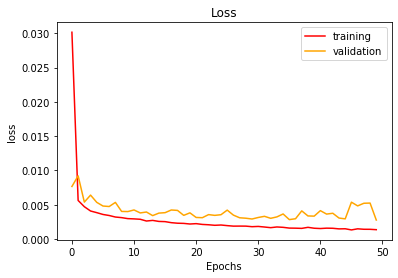

In [72]:
epochs = historyPCA.epoch

loss = historyPCA.history['loss']
validation_loss = historyPCA.history['val_loss']

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

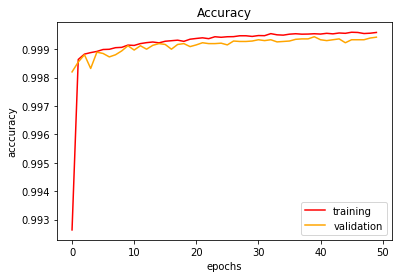

In [73]:
acc = historyPCA.history['accuracy']
validation_acc = historyPCA.history['val_accuracy']

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

Na osnovu oba grafika primecujemo da postoji variranje na validacionom skupu, to nam govori da je doslo do preprilagodjavanja pa je potrebno smanjiti broj epoha.

In [67]:
modelPCA_better = Sequential()
modelPCA_better.add(Dense(units=150, input_dim=X_train_pca.shape[1], activation='relu'))
modelPCA_better.add(Dense(units=50, activation='relu'))
modelPCA_better.add(Dense(units=1, activation='sigmoid'))

In [68]:
modelPCA_better.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [69]:
historyPCA_better = modelPCA_better.fit(X_train_pca, y_train, epochs=17, batch_size=32, verbose=1, validation_split=0.2)

Train on 264795 samples, validate on 66199 samples
Epoch 1/17
264795/264795 [==============================] - 135s 508us/step - loss: 0.0317 - accuracy: 0.9931 - val_loss: 0.0102 - val_accuracy: 0.9977
Epoch 2/17
264795/264795 [==============================] - 120s 453us/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.0077 - val_accuracy: 0.9986
Epoch 3/17
264795/264795 [==============================] - 76s 287us/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0074 - val_accuracy: 0.9987
Epoch 4/17
264795/264795 [==============================] - 66s 251us/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0075 - val_accuracy: 0.9989
Epoch 5/17
264795/264795 [==============================] - 72s 270us/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 6/17
264795/264795 [==============================] - 67s 254us/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0075 - val_accuracy: 0.9989
Epoch 7/17
264795/264795 [===============

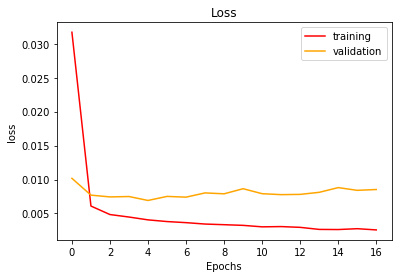

In [74]:
epochs = historyPCA_better.epoch

loss = historyPCA_better.history['loss']
validation_loss = historyPCA_better.history['val_loss']

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

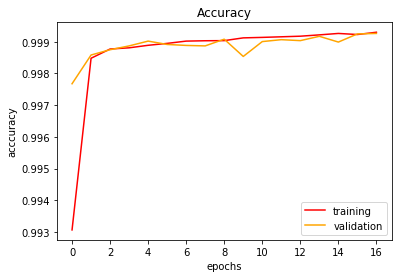

In [75]:
acc = historyPCA_better.history['accuracy']
validation_acc = historyPCA_better.history['val_accuracy']

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

Eksperimentalno je utvrdjeno da mreza daje najbolje rezultate za broj epoha 17.

In [76]:
y_predicted_pca = modelPCA_better.predict(X_test_pca)

In [77]:
loss_v_pca, acc_v_pca = modelPCA_better.evaluate(X_test_pca, y_test)

163027/163027 [==============================] - 21s 127us/step


Vrednost funkcije gubitka i tacnost na test skupu.

In [78]:
loss_v_pca

0.0026514348412711958

In [79]:
acc_v_pca

0.9993497729301453

Vrenost funkcije gubitka i tacnost na trening skupu.

In [80]:
loss_t_pca, acc_t_pca = modelPCA_better.evaluate(X_train_pca, y_train)

330994/330994 [==============================] - 44s 134us/step


In [81]:
loss_t_pca

0.003495339360228083

In [82]:
acc_t_pca

0.9993715882301331

S obzirom na to da nam je aktivaciona funkcija na poslednjem sloju sigmoida, a ona vraca vrednosti izmedju 0 i 1, potrebno je klasifikovati predvidjanja u klasu 1, ako je predvidjanje >= 0.5, a u klasu 0 u suprotnom.

In [83]:
y_predicted_pca = [int(prediction >= 0.5) for prediction in y_predicted_pca]

In [84]:
np.bincount(y_predicted_pca)

array([ 32126, 130901])

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
print(confusion_matrix(y_test, y_predicted_pca))

[[ 32061     41]
 [    65 130860]]


Mreza je 68 instanci koje su napad okarakterisala kao normalne, a 41 konekciju koja je normalna je okarakterisala kao napad.

In [87]:
print(classification_report(y_test, y_predicted_pca, digits = 7))

              precision    recall  f1-score   support

       False  0.9979767 0.9987228 0.9983496     32102
        True  0.9996868 0.9995035 0.9995952    130925

    accuracy                      0.9993498    163027
   macro avg  0.9988318 0.9991132 0.9989724    163027
weighted avg  0.9993501 0.9993498 0.9993499    163027



In [88]:
metrics.roc_curve(y_test, y_predicted_pca)

(array([0.        , 0.00127718, 1.        ]),
 array([0.        , 0.99950353, 1.        ]),
 array([2, 1, 0]))

In [89]:
metrics.roc_auc_score(y_test, y_predicted_pca)

0.9991131767824222

Povrsina ispod ROC krive nam ukazuje na to da nam model odlicno radi.

## Binarna klasifikacija sa RFE algoritmom

Formiramo model linearne regresije i prosledjujemo algoritmu RFE kao i broj atributa koje zelimo da izabere. Eksperimentalno je utvrdjeno da najbolje rezultate daje za 30 atributa. Nakon toga se podaci transformisu u skladu sa rezultatima RFE-a.

In [154]:
model_l = linear_model.LinearRegression()

rfe = feature_selection.RFE(model_l, n_features_to_select=30, verbose=1)

rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.


In [159]:
rfe.ranking_

array([ 9, 21,  1,  1, 22, 19,  4,  3,  1,  8,  1,  1, 23, 12,  2,  1,  1,
       17,  5, 14,  1, 15,  1, 10,  1,  1,  7,  6,  1, 16, 18, 13,  1, 20,
        1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

In [128]:
modelRFE = Sequential()
modelRFE.add(Dense(units=150, input_dim=X_train_rfe.shape[1], activation='relu'))
modelRFE.add(Dense(units=50, activation='relu'))
modelRFE.add(Dense(units=1, activation='sigmoid'))

modelRFE.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [129]:
historyRFE = modelRFE.fit(X_train_rfe, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Train on 264795 samples, validate on 66199 samples
Epoch 1/50
264795/264795 [==============================] - 123s 464us/step - loss: 0.0248 - accuracy: 0.9951 - val_loss: 0.0089 - val_accuracy: 0.9988
Epoch 2/50
264795/264795 [==============================] - 115s 436us/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 3/50
264795/264795 [==============================] - 125s 471us/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 4/50
264795/264795 [==============================] - 130s 492us/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 5/50
264795/264795 [==============================] - 131s 493us/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 0.9986
Epoch 6/50
264795/264795 [==============================] - 127s 479us/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9991
Epoch 7/50
264795/264795 [===========

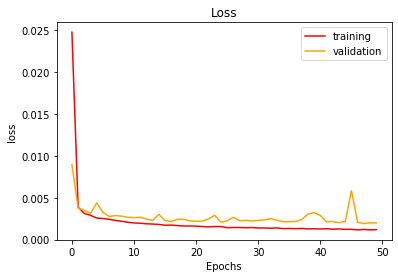

In [130]:
epochs = historyRFE.epoch

loss = historyRFE.history['loss']
validation_loss = historyRFE.history['val_loss']

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

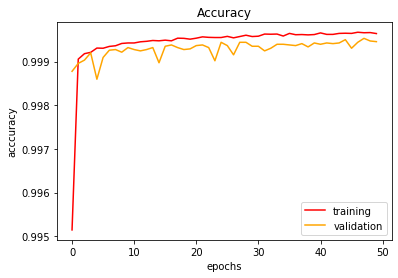

In [131]:
acc = historyRFE.history['accuracy']
validation_acc = historyRFE.history['val_accuracy']

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

Na osnovu oba grafika primecujemo da postoji variranje na validacionom skupu, to nam govori da je doslo do preprilagodjavanja pa je potrebno smanjiti broj epoha.

In [93]:
modelRFE_better = Sequential()
modelRFE_better.add(Dense(units=150, input_dim=X_train_rfe.shape[1], activation='relu'))
modelRFE_better.add(Dense(units=50, activation='relu'))
modelRFE_better.add(Dense(units=1, activation='sigmoid'))

modelRFE_better.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [94]:
historyRFE_better = modelRFE_better.fit(X_train_rfe, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Train on 264795 samples, validate on 66199 samples
Epoch 1/20
264795/264795 [==============================] - 118s 444us/step - loss: 0.0213 - accuracy: 0.9951 - val_loss: 0.0046 - val_accuracy: 0.9989
Epoch 2/20
264795/264795 [==============================] - 75s 282us/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 3/20
264795/264795 [==============================] - 78s 294us/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 4/20
264795/264795 [==============================] - 81s 307us/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 5/20
264795/264795 [==============================] - 77s 291us/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9991
Epoch 6/20
264795/264795 [==============================] - 66s 249us/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 7/20
264795/264795 [================

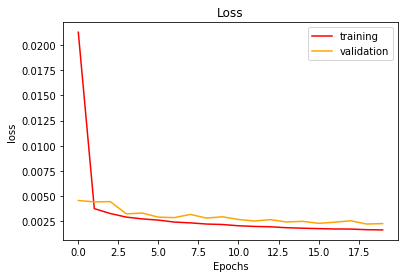

In [96]:
epochs = historyRFE_better.epoch

loss = historyRFE_better.history['loss']
validation_loss = historyRFE_better.history['val_loss']

plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

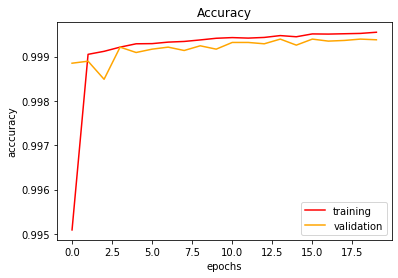

In [97]:
acc = historyRFE_better.history['accuracy']
validation_acc = historyRFE_better.history['val_accuracy']

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

Eksperimentalno je utvrdjeno da mreza daje najbolje rezultate za broj epoha 20.

In [98]:
y_predicted_rfe = modelRFE_better.predict(X_test_rfe)

In [99]:
loss_v_rfe, acc_v_rfe = modelRFE_better.evaluate(X_test_rfe, y_test)

163027/163027 [==============================] - 21s 128us/step


In [100]:
loss_v_rfe

0.0023511093301084884

In [101]:
acc_v_rfe

0.999417245388031

In [102]:
loss_t_rfe, acc_t_rfe = modelRFE_better.evaluate(X_train_rfe, y_train)

330994/330994 [==============================] - 44s 132us/step


In [103]:
loss_t_rfe

0.0016062885237643056

In [104]:
acc_t_rfe

0.9995589256286621

In [105]:
y_predicted_rfe = [int(prediction >= 0.5) for prediction in y_predicted_rfe] 

In [106]:
np.bincount(y_predicted_rfe)

array([ 32147, 130880])

In [107]:
print(confusion_matrix(y_test, y_predicted_rfe))

[[ 32077     25]
 [    70 130855]]


In [108]:
print(classification_report(y_test, y_predicted_rfe, digits = 7))

              precision    recall  f1-score   support

       False  0.9978225 0.9992212 0.9985214     32102
        True  0.9998090 0.9994653 0.9996371    130925

    accuracy                      0.9994173    163027
   macro avg  0.9988157 0.9993433 0.9990793    163027
weighted avg  0.9994178 0.9994173 0.9994174    163027



In [109]:
metrics.roc_curve(y_test, y_predicted_rfe)

(array([0.00000000e+00, 7.78767678e-04, 1.00000000e+00]),
 array([0.        , 0.99946534, 1.        ]),
 array([2, 1, 0]))

In [110]:
metrics.roc_auc_score(y_test, y_predicted_rfe)

0.9993432875377293

In [111]:
# Zelimo da vidimo koje instance su okarakterisane kao normalne a zapravo su napad

In [144]:
FN_mask = (np.array(y_test) == 1) & (np.array(y_predicted_rfe) == 0)

In [145]:
np.where(FN_mask == True)[0]

array([   917,   1182,   2507,   5786,  15015,  15984,  16470,  21033,
        21205,  21547,  22316,  22705,  26174,  27516,  29533,  32681,
        33506,  35424,  36722,  40764,  41452,  41982,  42538,  47322,
        51301,  51325,  51652,  55136,  59399,  64390,  65522,  68344,
        70307,  73172,  80732,  81532,  85740,  89526,  92324,  96503,
        96865,  98035, 102649, 105044, 105617, 105799, 107004, 111537,
       121629, 121884, 124349, 130282, 130568, 132243, 134608, 135141,
       135828, 137340, 137582, 140056, 141264, 141327, 144202, 144410,
       149989, 153415, 156364, 157634, 159903, 160650])

In [153]:
for instance in np.where(FN_mask)[0]:
    print(X_test[instance])

[-6.82867640e-02  0.00000000e+00 -1.26425243e+00  2.07523131e-01
  0.00000000e+00 -3.01059638e-03 -7.97914582e-02 -1.00212924e-01
 -1.64927717e-01 -2.60520066e-01  5.85827983e-01  1.24489977e+00
  0.00000000e+00  9.86616321e+01 -5.86069971e-02  4.67404049e-01
 -5.49543692e-01  4.20624213e-02  2.11979577e-01 -6.73202019e-03
 -4.79449042e-02 -2.62038492e-03  1.20034758e+00 -9.35403393e-03
  2.39662922e+00 -5.46698003e-03 -1.04295317e-02 -4.66402545e-03
 -5.35999602e-03 -1.15017991e-02 -9.21838107e-03 -2.72449483e-02
 -3.77092096e-02 -1.53099227e+00 -1.16454865e+00 -1.78896839e-02
 -1.77296607e-02 -2.48044515e-01 -2.48744724e-01  5.37092271e-01
 -2.56047150e-01 -2.03482351e-01  3.47877533e-01  6.25591104e-01
  5.99359145e-01 -2.82793230e-01 -1.24986182e+00 -1.57555129e-01
 -4.38336125e-01 -4.37192010e-01 -7.85603947e-02 -7.56873588e-02]
[-6.82867640e-02  0.00000000e+00 -1.26425243e+00  2.07523131e-01
  0.00000000e+00 -3.01059638e-03 -7.97914582e-02 -1.00212924e-01
 -1.64927717e-01  3.8384

[-6.82867640e-02  0.00000000e+00 -1.26425243e+00  2.07523131e-01
  0.00000000e+00 -3.01059638e-03 -7.97914582e-02 -1.00212924e-01
 -1.64927717e-01  3.83847592e+00 -1.70698572e+00 -8.03277518e-01
  0.00000000e+00 -1.01356523e-02 -5.86069971e-02  4.67404049e-01
 -5.49543692e-01 -2.85651160e-03 -2.58941579e-02 -6.73202019e-03
 -4.79449042e-02 -2.62038492e-03 -4.45071855e-02 -9.35403393e-03
  2.39662922e+00 -5.46698003e-03 -1.04295317e-02 -4.66402545e-03
 -5.35999602e-03 -1.15017991e-02 -9.21838107e-03 -2.72449483e-02
 -3.77092096e-02 -1.55445167e+00 -1.18484609e+00 -4.64288709e-01
 -4.63761245e-01 -2.48044515e-01 -2.48744724e-01  5.37092271e-01
 -2.56047150e-01 -2.03482351e-01  3.47877533e-01 -1.11858724e+00
 -1.17756150e+00  9.13264864e-01 -4.81203397e-01 -1.57555129e-01
 -4.12069061e-01 -4.37192010e-01 -2.52011567e-01 -2.49471140e-01]
[-6.82867640e-02  0.00000000e+00  7.90981275e-01 -4.81873994e+00
  0.00000000e+00 -3.01059638e-03 -7.97914582e-02 -1.00212924e-01
 -1.64927717e-01 -2.6052

 -4.64603189e-01 -4.63435788e-01 -2.52011567e-01 -2.49471140e-01]
[-6.82867640e-02  0.00000000e+00  7.90981275e-01  2.07523131e-01
  0.00000000e+00 -3.01059638e-03 -7.97914582e-02 -1.00212924e-01
 -1.64927717e-01 -2.60520066e-01  5.85827983e-01 -8.03277518e-01
  0.00000000e+00 -1.01356523e-02 -5.86069971e-02  4.67404049e-01
 -5.49543692e-01 -3.12665830e-03 -2.58941579e-02 -6.73202019e-03
 -4.79449042e-02 -2.62038492e-03 -4.45071855e-02 -9.35403393e-03
 -4.17252694e-01 -5.46698003e-03 -1.04295317e-02 -4.66402545e-03
 -5.35999602e-03 -1.15017991e-02 -9.21838107e-03 -2.72449483e-02
 -3.77092096e-02 -1.55445167e+00 -1.18484609e+00 -4.64288709e-01
 -4.63761245e-01 -2.48044515e-01 -2.48744724e-01  5.37092271e-01
 -2.56047150e-01 -2.03482351e-01 -3.57469357e+00 -1.76911863e+00
  5.99359145e-01 -2.82793230e-01  8.27593385e-01 -1.57555129e-01
 -4.64603189e-01 -4.63435788e-01 -2.52011567e-01 -2.49471140e-01]
[-6.82867640e-02  0.00000000e+00 -1.26425243e+00  2.07523131e-01
  0.00000000e+00 -3.010

 -4.64603189e-01 -4.63435788e-01 -2.52011567e-01 -2.49471140e-01]
[ 5.53175202e-02  0.00000000e+00 -1.26425243e+00  2.07523131e-01
  0.00000000e+00 -3.01059638e-03 -7.97914582e-02  9.97875288e+00
 -1.64927717e-01 -2.60520066e-01  5.85827983e-01 -8.03277518e-01
  0.00000000e+00 -1.01356523e-02 -5.86069971e-02  4.67404049e-01
 -5.49543692e-01 -2.90374584e-03 -6.06896273e-03 -6.73202019e-03
 -4.79449042e-02 -2.62038492e-03 -4.45071855e-02 -9.35403393e-03
 -4.17252694e-01 -5.46698003e-03 -1.04295317e-02 -4.66402545e-03
 -5.35999602e-03 -1.15017991e-02 -9.21838107e-03 -2.72449483e-02
 -3.77092096e-02 -1.55445167e+00 -1.18484609e+00 -4.64288709e-01
 -4.63761245e-01 -2.48044515e-01 -2.48744724e-01  5.37092271e-01
 -2.56047150e-01 -2.03482351e-01 -3.57469357e+00 -1.76911863e+00
  5.99359145e-01 -2.82793230e-01  8.27593385e-01 -1.57555129e-01
 -4.64603189e-01 -4.63435788e-01 -2.52011567e-01 -2.49471140e-01]
[-6.82867640e-02  0.00000000e+00 -1.26425243e+00  2.07523131e-01
  0.00000000e+00 -3.010

[-6.82867640e-02  0.00000000e+00 -1.26425243e+00  2.07523131e-01
  0.00000000e+00 -3.01059638e-03 -7.97914582e-02 -1.00212924e-01
 -1.64927717e-01  3.83847592e+00 -1.70698572e+00 -8.03277518e-01
  0.00000000e+00 -1.01356523e-02 -5.86069971e-02  4.67404049e-01
 -5.49543692e-01 -3.13328767e-03  1.43692793e-01 -6.73202019e-03
 -4.79449042e-02 -2.62038492e-03 -4.45071855e-02 -9.35403393e-03
  2.39662922e+00 -5.46698003e-03 -1.04295317e-02 -4.66402545e-03
 -5.35999602e-03 -1.15017991e-02 -9.21838107e-03 -2.72449483e-02
 -3.77092096e-02 -1.54975979e+00 -1.18078660e+00 -4.64288709e-01
 -4.63761245e-01 -2.48044515e-01 -2.48744724e-01  5.37092271e-01
 -2.56047150e-01 -2.03482351e-01 -3.55925038e+00 -1.00545135e+00
  5.99359145e-01 -2.82793230e-01  8.27593385e-01  3.15435355e-01
 -4.64603189e-01 -4.63435788e-01 -2.52011567e-01 -2.49471140e-01]
[ 1.89633189e-02  0.00000000e+00 -1.26425243e+00  2.07523131e-01
  0.00000000e+00 -3.01059638e-03 -7.97914582e-02  9.97875288e+00
 -1.64927717e-01 -2.6052